Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,18.647,11.390 (61.08%),5.4589 (29.28%),5.2943 (28.39%)
15,26.958,16.057 (59.56%),6.9193 (25.67%),6.6165 (24.54%)
20,35.470,20.130 (56.75%),8.0610 (22.73%),7.6280 (21.51%)
30,53.290,28.020 (52.58%),10.800 (20.27%),9.8842 (18.55%)
50,90.238,42.924 (47.57%),16.110 (17.85%),14.057 (15.58%)
70,131.44,56.459 (42.95%),22.155 (16.86%),18.000 (13.69%)
100,190.38,76.823 (40.35%),29.546 (15.52%),23.559 (12.37%)
150,291.48,102.39 (35.13%),43.963 (15.08%),33.082 (11.35%)
200,394.50,127.25 (32.26%),60.136 (15.24%),41.596 (10.54%)
300,593.69,172.15 (29.00%),89.664 (15.10%),58.542 (9.861%)


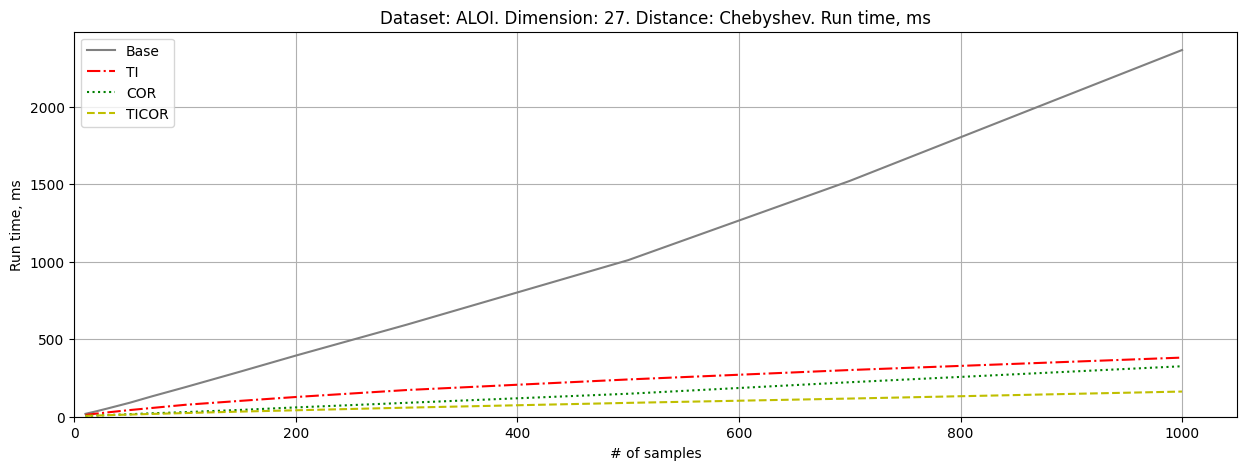

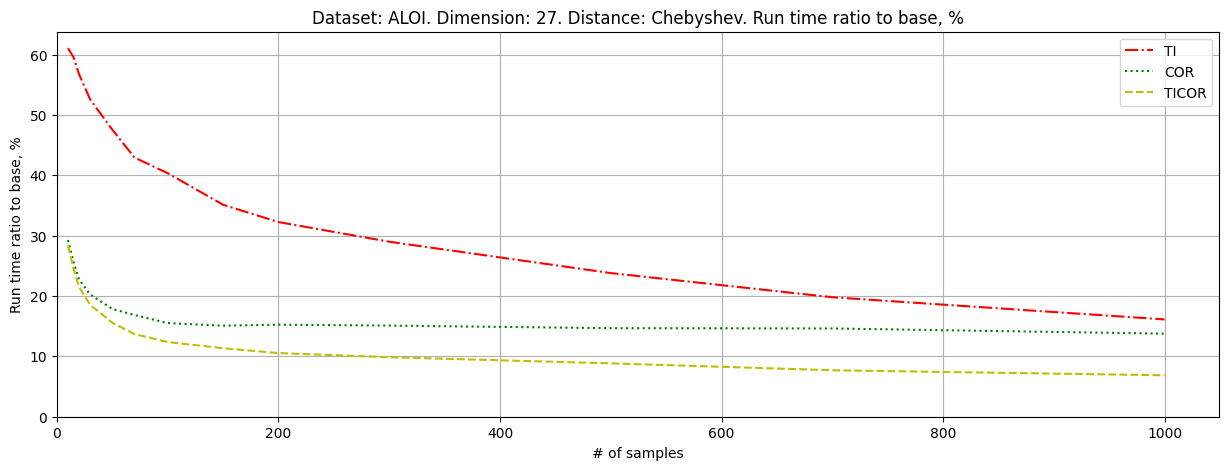

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","DP run time, ms (% to base)","TICOR run time, ms (% to base)","TICORDP run time, ms (% to base)"
10,12.760,7.2413 (56.75%),3.8420 (30.11%),8.0795 (63.32%),3.8526 (30.19%),4.0934 (32.08%)
15,17.222,9.5876 (55.67%),4.5736 (26.56%),11.311 (65.68%),4.5045 (26.16%),4.6945 (27.26%)
20,21.602,11.697 (54.15%),5.1137 (23.67%),14.219 (65.82%),5.0732 (23.48%),5.2865 (24.47%)
30,31.007,16.263 (52.45%),6.5494 (21.12%),20.667 (66.65%),6.3508 (20.48%),6.3932 (20.62%)
50,49.988,24.950 (49.91%),9.1570 (18.32%),35.088 (70.19%),8.7243 (17.45%),8.6039 (17.21%)
70,71.066,33.614 (47.30%),12.018 (16.91%),51.629 (72.65%),11.371 (16.00%),11.204 (15.77%)
100,101.19,44.283 (43.76%),15.913 (15.73%),74.474 (73.60%),14.361 (14.19%),13.753 (13.59%)
150,153.88,59.926 (38.94%),23.314 (15.15%),116.58 (75.76%),19.942 (12.96%),19.297 (12.54%)
200,203.44,74.693 (36.72%),29.663 (14.58%),153.47 (75.44%),24.662 (12.12%),23.484 (11.54%)
300,299.69,103.31 (34.47%),43.173 (14.41%),225.93 (75.39%),34.414 (11.48%),32.430 (10.82%)


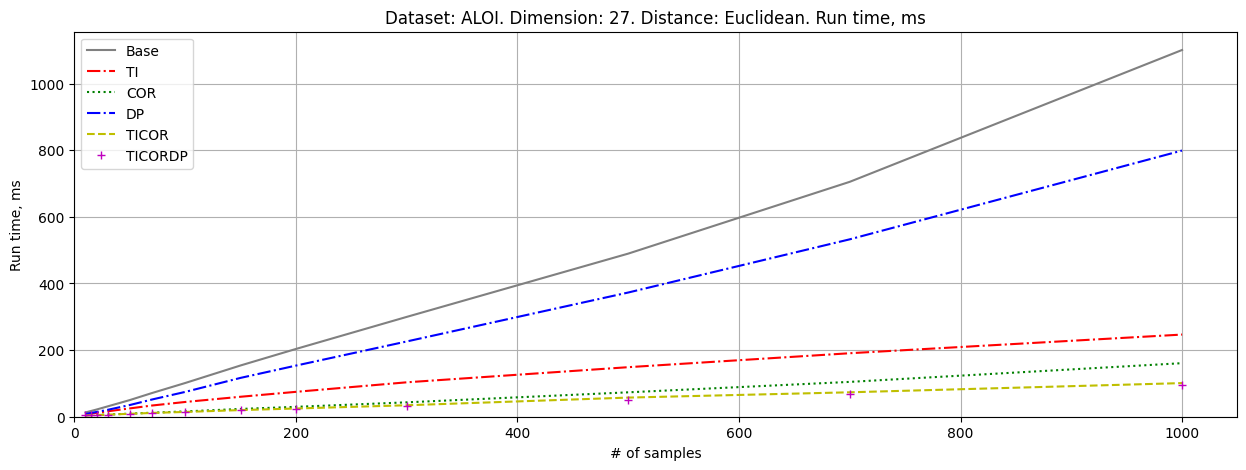

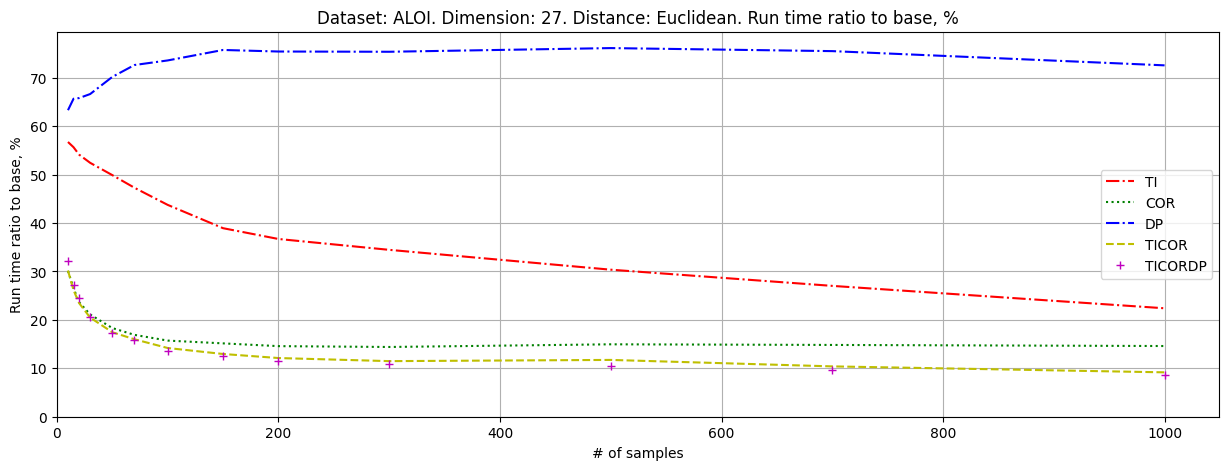

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,13.451,7.9869 (59.38%),4.3036 (31.99%),4.2480 (31.58%)
15,18.678,10.577 (56.63%),5.1701 (27.68%),5.0143 (26.85%)
20,23.778,13.265 (55.79%),5.7595 (24.22%),5.5520 (23.35%)
30,33.948,18.302 (53.91%),7.1643 (21.10%),6.9845 (20.57%)
50,56.422,28.056 (49.72%),10.239 (18.15%),9.7252 (17.24%)
70,82.384,37.884 (45.99%),13.787 (16.74%),12.510 (15.19%)
100,119.13,50.420 (42.32%),18.474 (15.51%),15.936 (13.38%)
150,179.69,70.565 (39.27%),26.528 (14.76%),21.836 (12.15%)
200,238.66,88.445 (37.06%),34.614 (14.50%),28.144 (11.79%)
300,355.84,119.38 (33.55%),53.135 (14.93%),40.049 (11.25%)


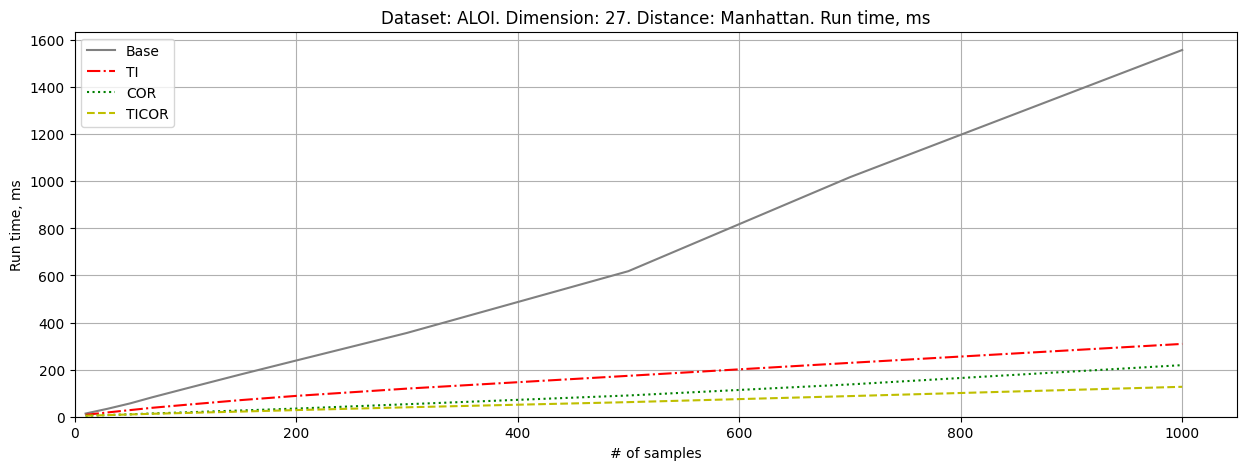

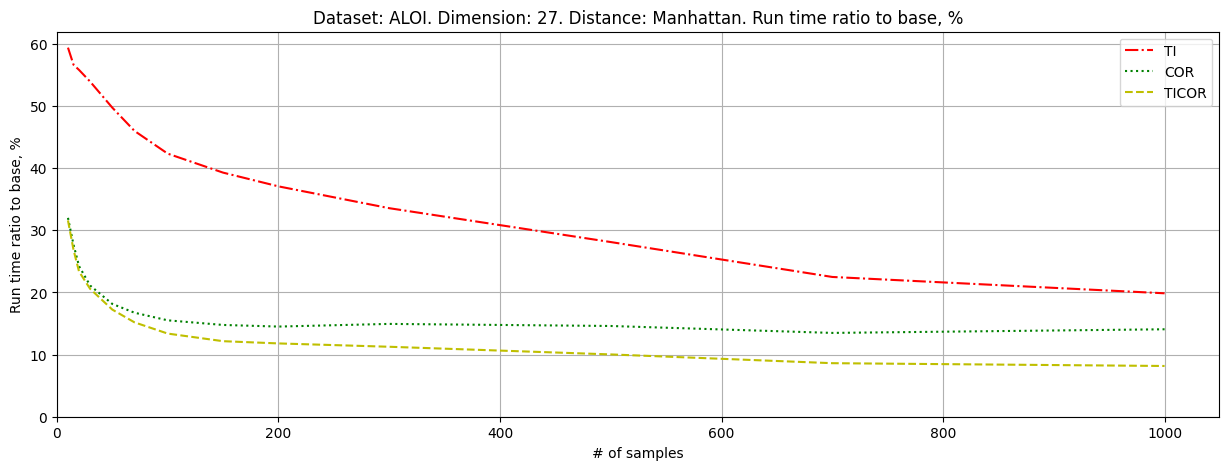

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,167.93,102.87 (61.26%),30.626 (18.24%),30.671 (18.26%)
15,248.51,152.32 (61.29%),37.591 (15.13%),37.660 (15.15%)
20,328.87,197.50 (60.06%),44.991 (13.68%),45.256 (13.76%)
30,501.48,292.39 (58.31%),59.485 (11.86%),59.505 (11.87%)
50,874.01,469.88 (53.76%),88.899 (10.17%),87.970 (10.07%)
70,1273.0,632.31 (49.67%),106.48 (8.364%),103.33 (8.117%)
100,1873.0,859.96 (45.91%),161.53 (8.624%),156.45 (8.353%)
150,2880.9,1221.7 (42.41%),226.08 (7.847%),214.67 (7.451%)
200,3941.0,1546.4 (39.24%),303.86 (7.710%),279.25 (7.086%)
300,6080.9,2081.1 (34.22%),457.67 (7.526%),402.43 (6.618%)


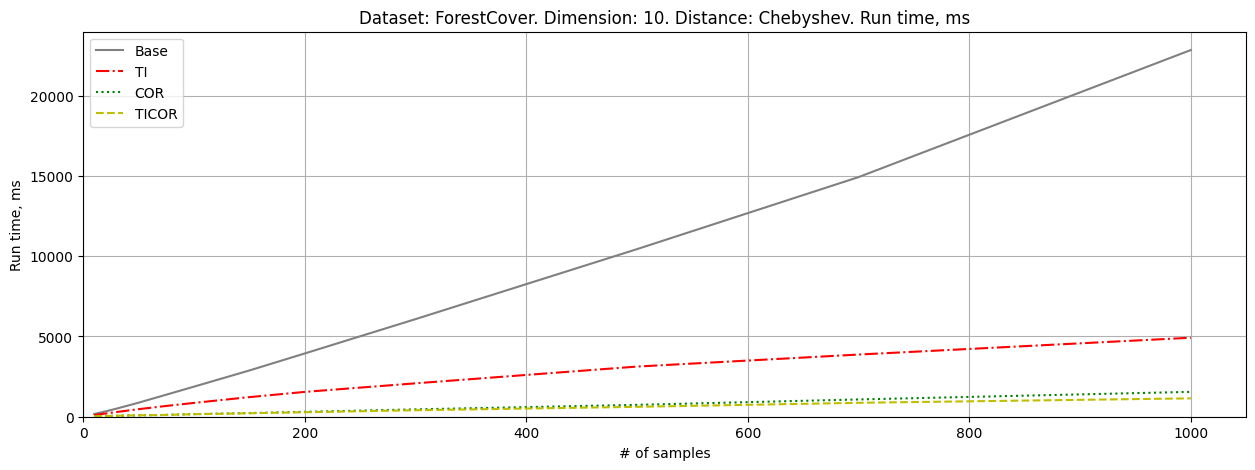

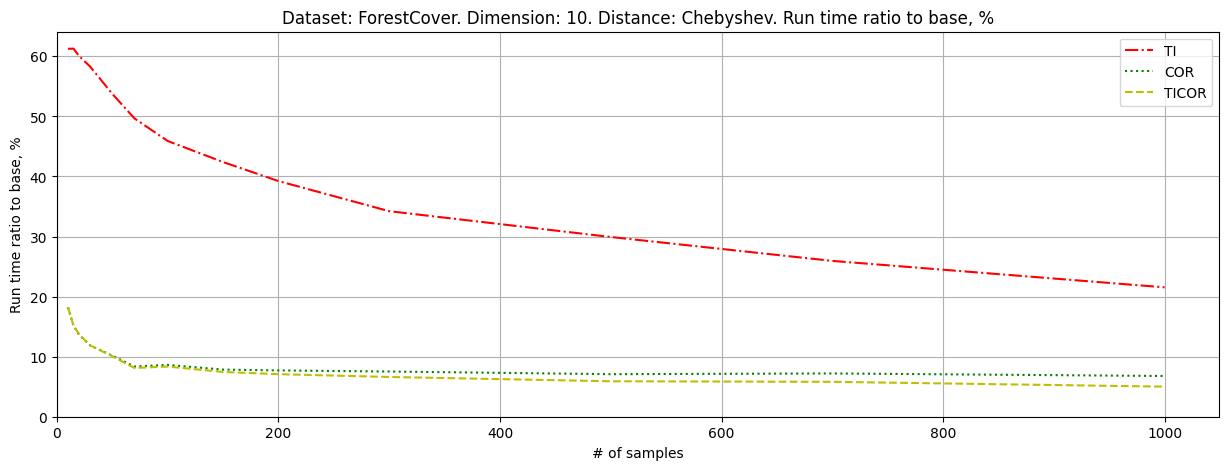

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","DP run time, ms (% to base)","TICOR run time, ms (% to base)","TICORDP run time, ms (% to base)"
10,110.11,57.730 (52.43%),20.320 (18.45%),48.007 (43.60%),20.472 (18.59%),20.649 (18.75%)
15,148.61,80.037 (53.86%),23.944 (16.11%),68.674 (46.21%),23.758 (15.99%),23.647 (15.91%)
20,190.12,102.47 (53.90%),27.391 (14.41%),89.262 (46.95%),27.746 (14.59%),27.017 (14.21%)
30,267.96,143.83 (53.68%),35.096 (13.10%),128.87 (48.09%),35.549 (13.27%),33.449 (12.48%)
50,417.20,222.91 (53.43%),50.701 (12.15%),207.09 (49.64%),51.134 (12.26%),47.063 (11.28%)
70,569.46,302.38 (53.10%),62.290 (10.94%),283.97 (49.87%),63.169 (11.09%),57.664 (10.13%)
100,789.16,410.80 (52.06%),80.173 (10.16%),402.89 (51.05%),81.390 (10.31%),72.854 (9.232%)
150,1169.2,581.07 (49.70%),109.00 (9.322%),614.00 (52.51%),111.15 (9.507%),97.875 (8.371%)
200,1572.4,734.50 (46.71%),118.64 (7.545%),842.03 (53.55%),120.94 (7.691%),106.25 (6.757%)
300,2361.7,1002.1 (42.43%),172.57 (7.307%),1281.2 (54.25%),174.77 (7.400%),153.92 (6.517%)


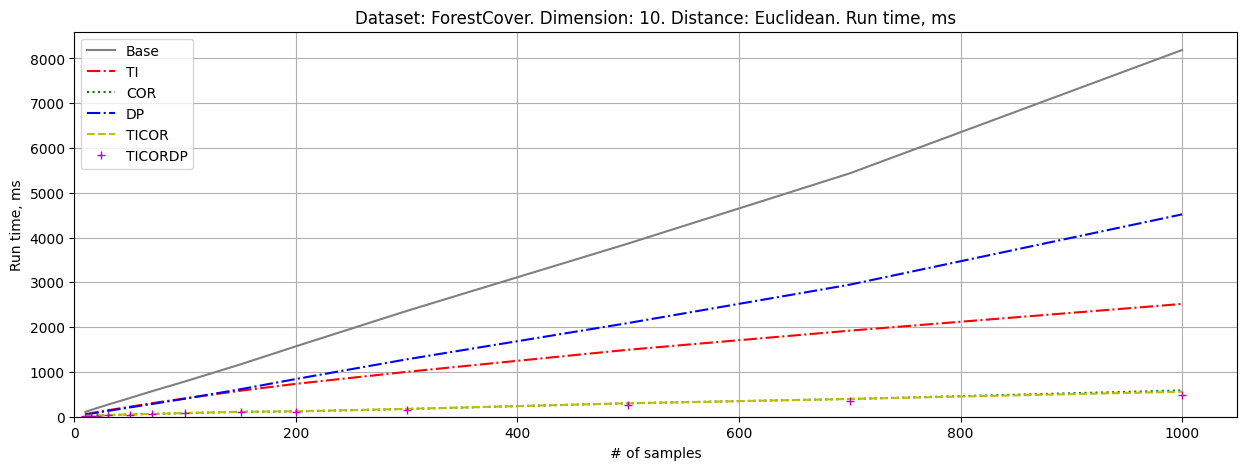

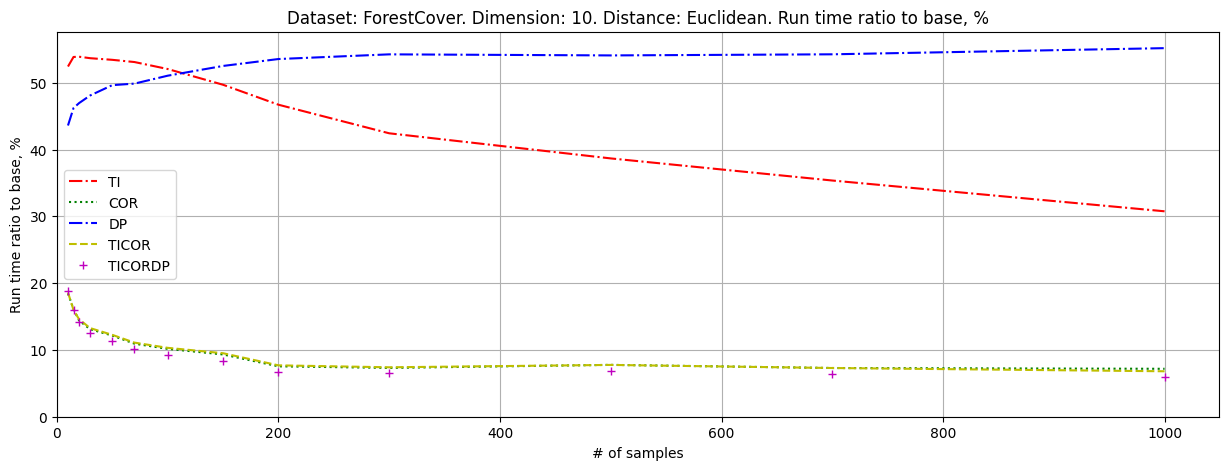

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,107.51,55.944 (52.03%),20.538 (19.10%),20.434 (19.01%)
15,148.77,77.791 (52.29%),25.318 (17.02%),25.301 (17.01%)
20,190.67,101.25 (53.10%),29.302 (15.37%),29.237 (15.33%)
30,266.07,141.63 (53.23%),36.640 (13.77%),37.071 (13.93%)
50,420.83,223.36 (53.08%),49.067 (11.66%),50.440 (11.99%)
70,585.89,307.27 (52.44%),64.104 (10.94%),65.637 (11.20%)
100,831.08,417.83 (50.28%),78.513 (9.447%),81.747 (9.836%)
150,1294.7,591.44 (45.68%),115.47 (8.919%),120.10 (9.277%)
200,1772.7,784.68 (44.26%),157.72 (8.897%),163.65 (9.232%)
300,2682.0,1056.1 (39.38%),201.99 (7.531%),205.70 (7.670%)


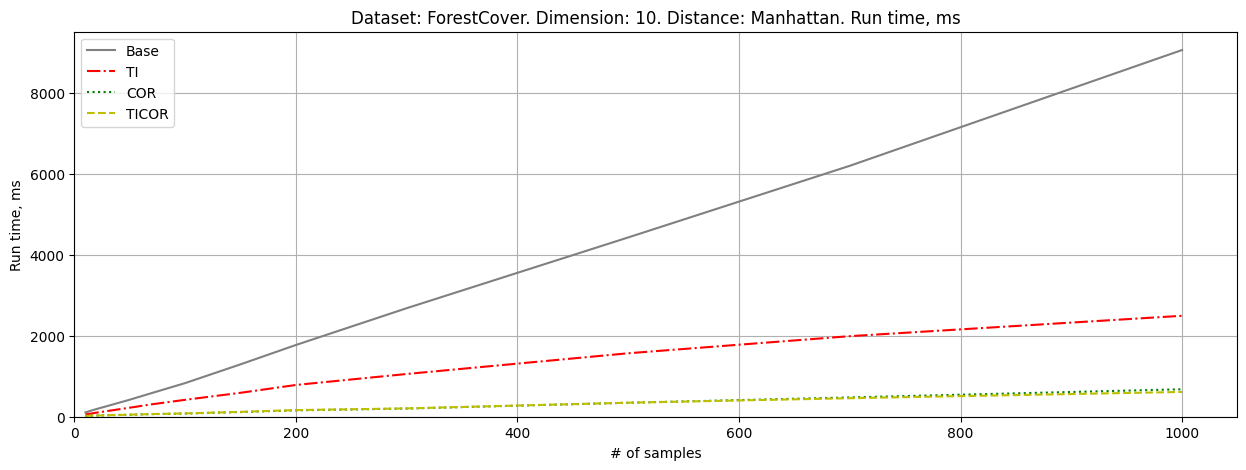

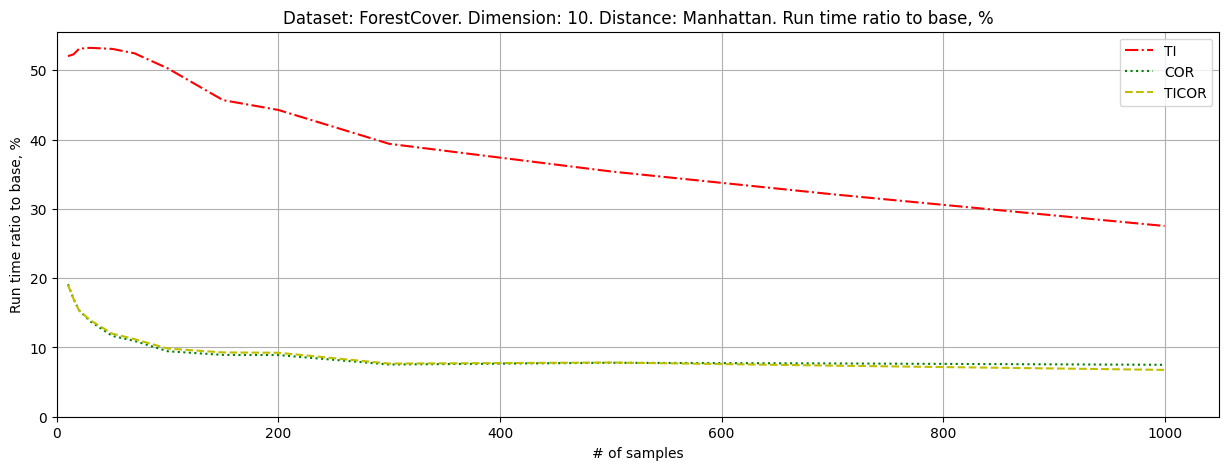

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,3.4934,2.5268 (72.33%),2.6381 (75.52%),2.3480 (67.21%)
15,5.0283,3.4324 (68.26%),3.8743 (77.05%),3.1869 (63.38%)
20,6.6086,4.1792 (63.24%),5.0130 (75.86%),3.9927 (60.42%)
30,9.4656,5.5482 (58.61%),7.3634 (77.79%),5.3434 (56.45%)
50,15.655,8.0956 (51.71%),12.017 (76.76%),7.7977 (49.81%)
70,22.355,10.693 (47.83%),16.935 (75.75%),10.060 (45.00%)
100,32.152,14.484 (45.05%),24.031 (74.74%),13.784 (42.87%)
150,47.725,20.141 (42.20%),35.634 (74.67%),18.802 (39.40%)
200,63.071,24.781 (39.29%),47.032 (74.57%),23.498 (37.26%)
300,91.469,35.875 (39.22%),68.900 (75.33%),33.948 (37.11%)


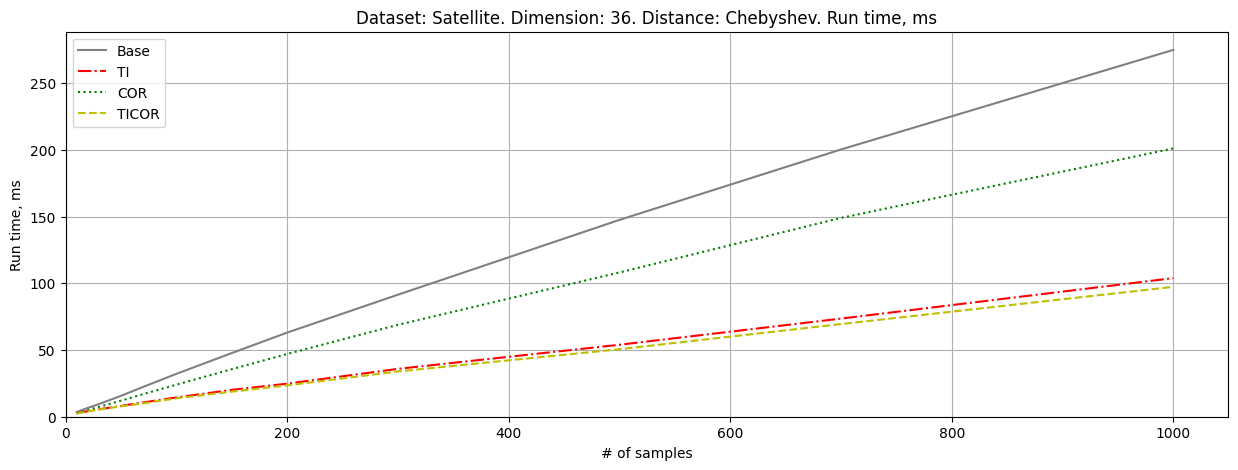

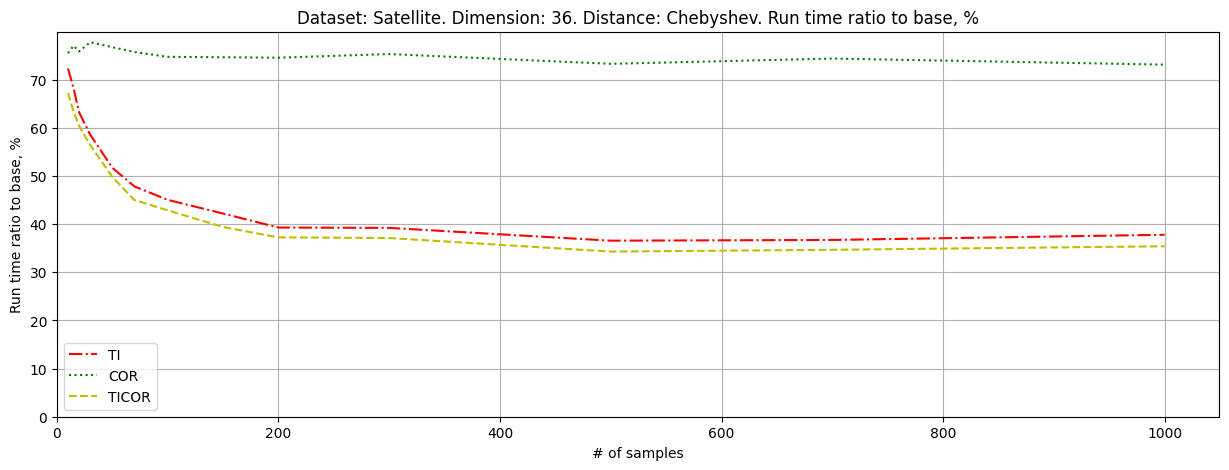

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","DP run time, ms (% to base)","TICOR run time, ms (% to base)","TICORDP run time, ms (% to base)"
10,1.8277,1.2500 (68.39%),1.2973 (70.98%),1.3863 (75.85%),1.1665 (63.82%),1.1502 (62.93%)
15,2.3460,1.5228 (64.91%),1.7106 (72.92%),1.7723 (75.54%),1.4869 (63.38%),1.4159 (60.35%)
20,2.8372,1.7291 (60.94%),2.1494 (75.76%),2.1931 (77.30%),1.7317 (61.03%),1.6516 (58.21%)
30,3.9001,2.1876 (56.09%),2.8516 (73.12%),2.8924 (74.16%),2.1659 (55.53%),2.0739 (53.18%)
50,5.8438,2.9655 (50.75%),4.4087 (75.44%),4.4975 (76.96%),2.9650 (50.74%),2.8493 (48.76%)
70,8.0386,3.7475 (46.62%),5.7893 (72.02%),6.1228 (76.17%),3.6846 (45.84%),3.5214 (43.81%)
100,10.918,5.0251 (46.03%),7.9292 (72.63%),8.5788 (78.58%),4.8491 (44.41%),4.5195 (41.40%)
150,16.700,7.0601 (42.28%),11.791 (70.60%),12.856 (76.98%),6.7408 (40.36%),6.2971 (37.71%)
200,21.699,8.8949 (40.99%),15.800 (72.81%),17.114 (78.87%),8.9248 (41.13%),7.9535 (36.65%)
300,31.197,13.013 (41.71%),22.401 (71.80%),24.426 (78.29%),12.371 (39.65%),11.651 (37.34%)


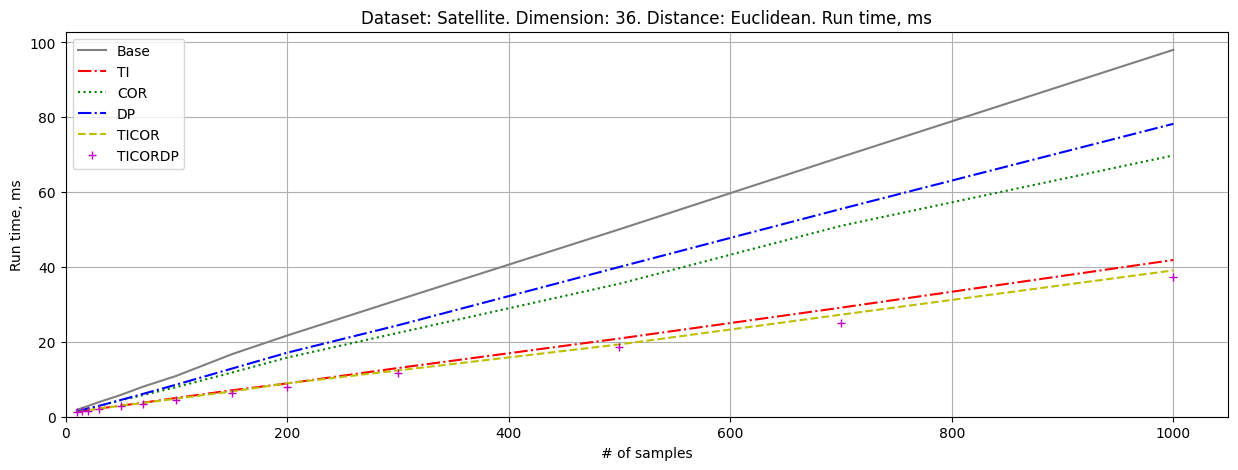

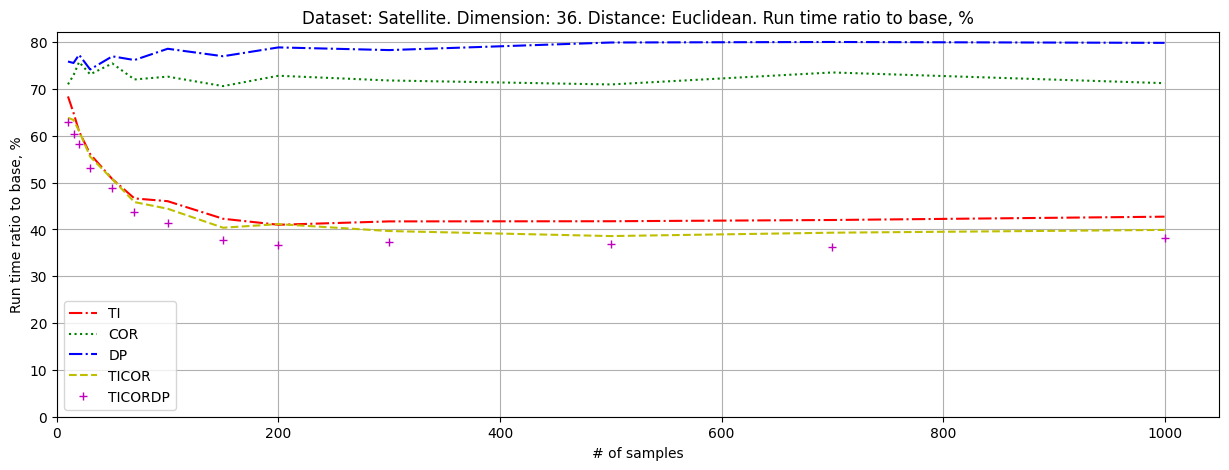

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,1.8968,1.2508 (65.94%),1.3521 (71.28%),1.1839 (62.42%)
15,2.4641,1.5580 (63.23%),1.8731 (76.02%),1.5288 (62.04%)
20,3.0319,1.7277 (56.98%),2.2492 (74.18%),1.7167 (56.62%)
30,4.1183,2.1846 (53.05%),3.0963 (75.18%),2.1896 (53.17%)
50,6.3073,2.8389 (45.01%),4.5453 (72.06%),2.8655 (45.43%)
70,8.3775,3.7227 (44.44%),5.9780 (71.36%),3.6954 (44.11%)
100,11.874,4.7280 (39.82%),8.4799 (71.42%),4.6982 (39.57%)
150,18.218,6.8547 (37.63%),13.100 (71.91%),6.7236 (36.91%)
200,23.996,8.8525 (36.89%),17.140 (71.43%),8.5670 (35.70%)
300,34.660,12.545 (36.19%),24.794 (71.53%),12.414 (35.82%)


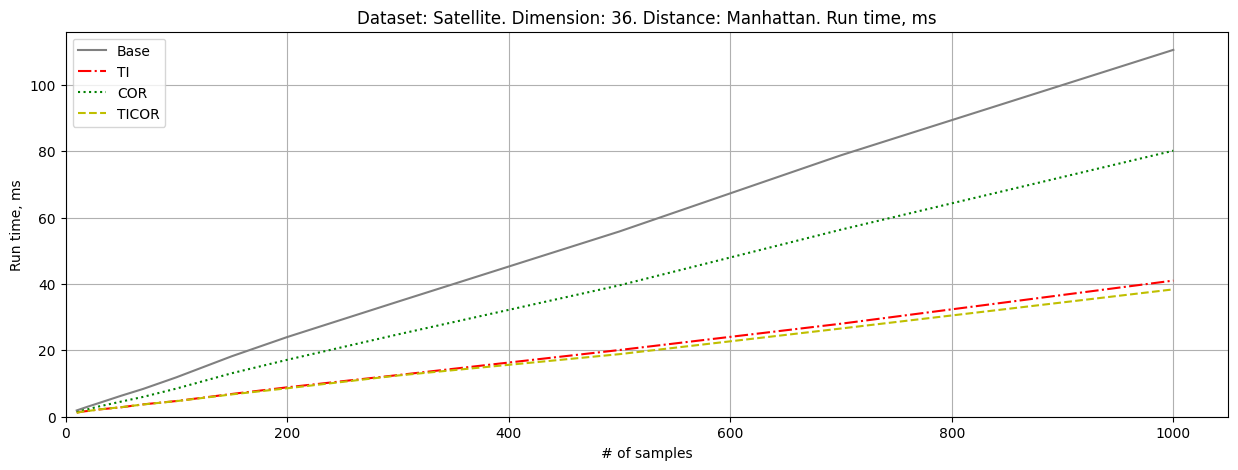

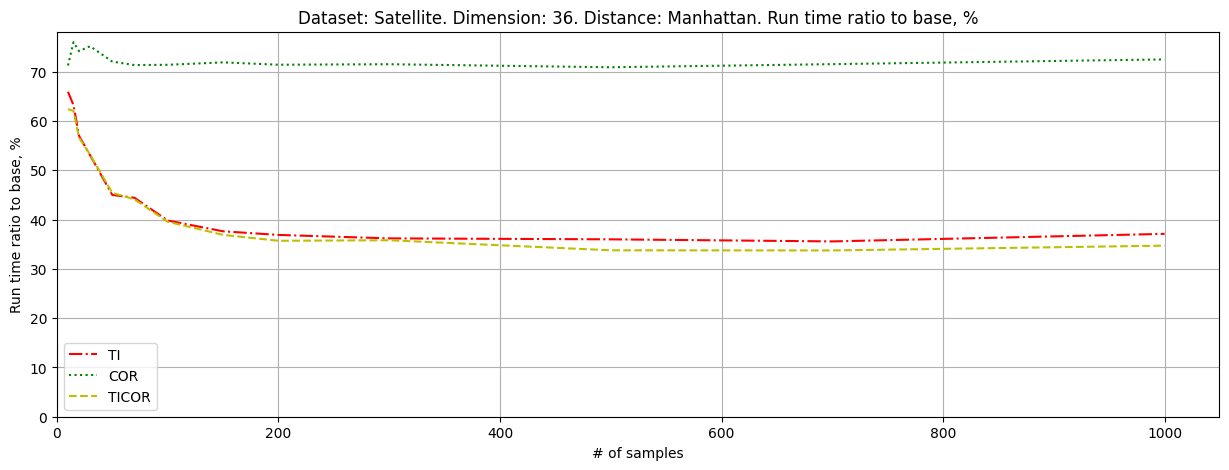

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,14.133,7.1590 (50.65%),6.2345 (44.11%),5.6559 (40.02%)
15,19.504,8.6399 (44.30%),7.7626 (39.80%),6.5820 (33.75%)
20,25.710,10.221 (39.75%),9.4235 (36.65%),7.6315 (29.68%)
30,38.483,12.691 (32.98%),12.769 (33.18%),8.9746 (23.32%)
50,65.880,17.240 (26.17%),19.999 (30.36%),11.677 (17.73%)
70,96.414,21.277 (22.07%),27.687 (28.72%),13.823 (14.34%)
100,135.71,24.709 (18.21%),40.853 (30.10%),16.335 (12.04%)
150,208.62,31.613 (15.15%),61.201 (29.34%),20.499 (9.826%)
200,277.16,36.645 (13.22%),80.070 (28.89%),22.880 (8.255%)
300,416.88,45.036 (10.80%),117.26 (28.13%),29.406 (7.054%)


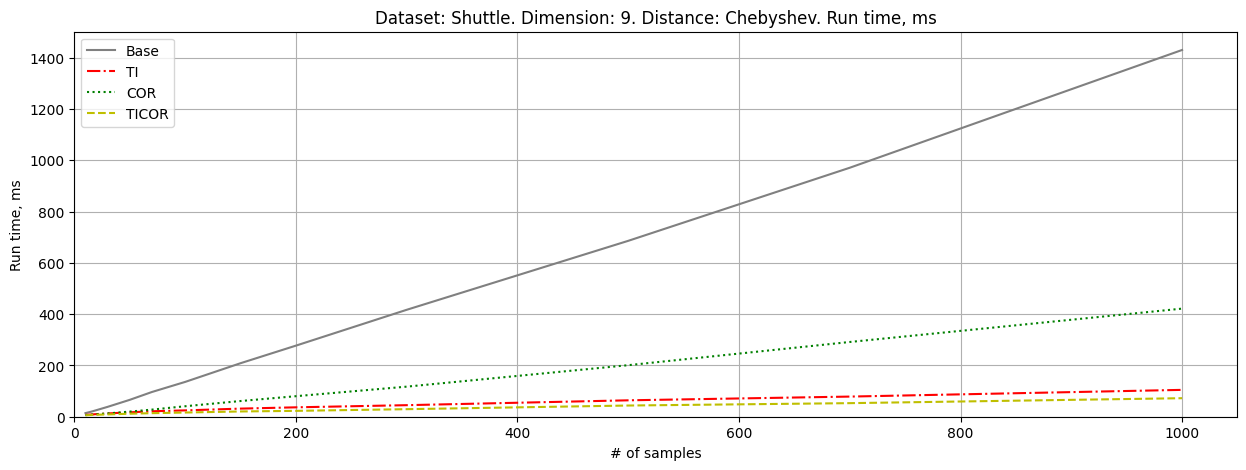

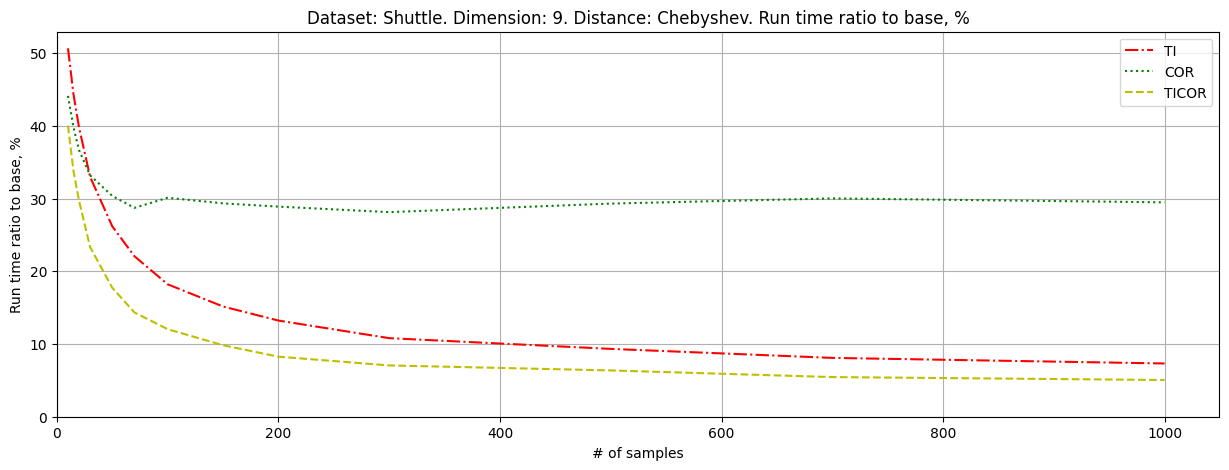

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","DP run time, ms (% to base)","TICOR run time, ms (% to base)","TICORDP run time, ms (% to base)"
10,10.981,6.1896 (56.37%),4.7342 (43.11%),6.0849 (55.41%),4.5348 (41.30%),4.4315 (40.36%)
15,14.553,7.3515 (50.52%),5.7567 (39.56%),7.7165 (53.02%),5.3381 (36.68%),5.1453 (35.36%)
20,17.118,8.2115 (47.97%),6.5825 (38.45%),9.1532 (53.47%),5.8281 (34.05%),5.5596 (32.48%)
30,23.061,9.8740 (42.82%),8.0633 (34.96%),11.920 (51.69%),6.8592 (29.74%),6.4490 (27.96%)
50,33.804,12.651 (37.42%),10.690 (31.62%),17.095 (50.57%),8.2965 (24.54%),7.7196 (22.84%)
70,44.545,14.917 (33.49%),13.265 (29.78%),22.384 (50.25%),9.3740 (21.04%),8.8084 (19.77%)
100,60.426,17.926 (29.67%),16.935 (28.03%),30.117 (49.84%),11.280 (18.67%),10.468 (17.32%)
150,87.811,22.788 (25.95%),23.966 (27.29%),45.043 (51.29%),14.281 (16.26%),13.104 (14.92%)
200,114.03,25.705 (22.54%),31.298 (27.45%),58.925 (51.68%),16.205 (14.21%),14.963 (13.12%)
300,170.61,33.774 (19.80%),42.988 (25.20%),89.073 (52.21%),21.004 (12.31%),19.352 (11.34%)


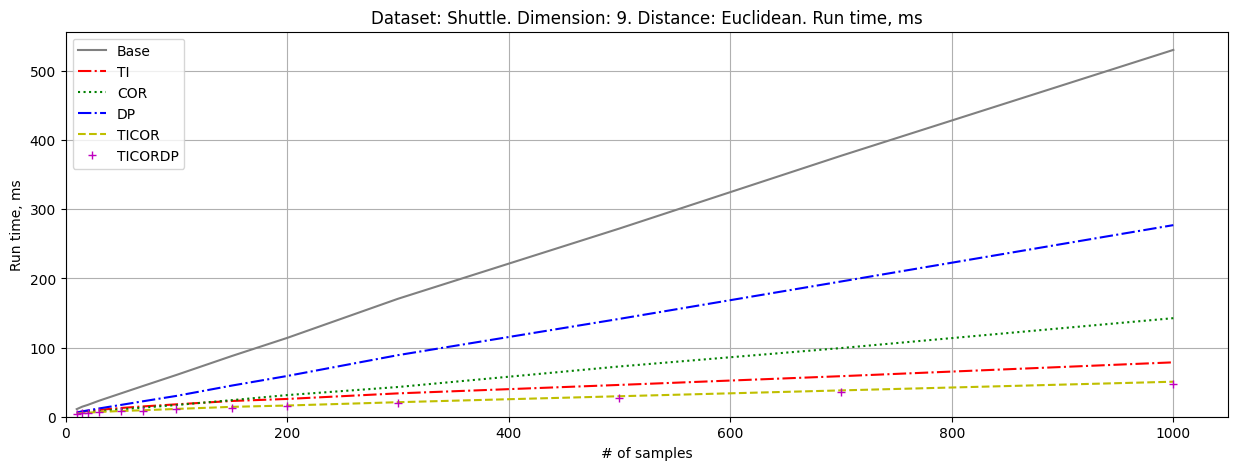

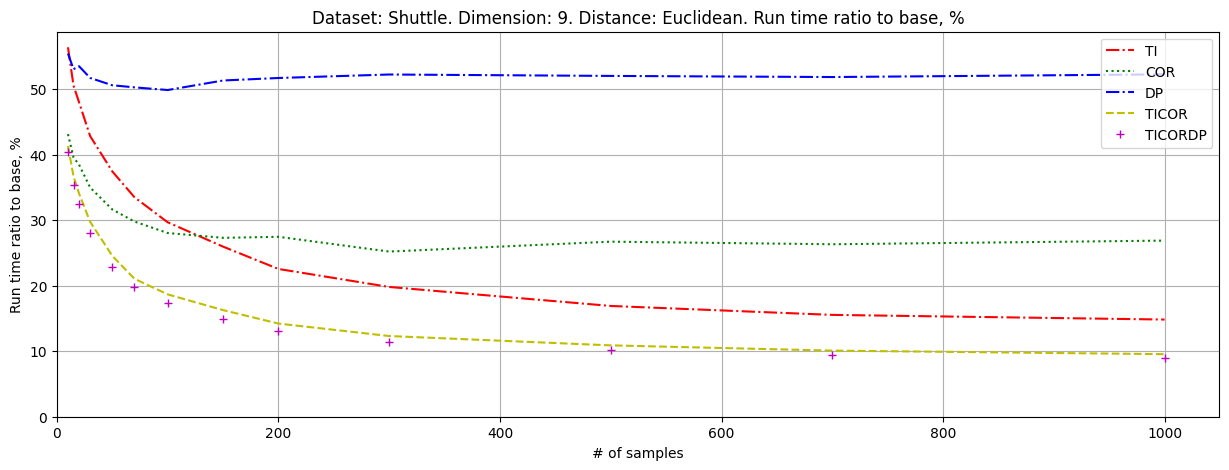

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,10.872,6.2138 (57.15%),4.7365 (43.57%),4.5132 (41.51%)
15,13.971,7.1864 (51.44%),5.5465 (39.70%),5.1806 (37.08%)
20,16.910,8.2729 (48.92%),6.3897 (37.79%),5.8405 (34.54%)
30,22.470,9.8345 (43.77%),7.9690 (35.47%),6.9170 (30.78%)
50,32.988,12.817 (38.85%),10.618 (32.19%),8.5215 (25.83%)
70,46.594,15.487 (33.24%),13.808 (29.63%),10.263 (22.03%)
100,67.249,18.707 (27.82%),17.627 (26.21%),12.059 (17.93%)
150,94.581,22.730 (24.03%),25.478 (26.94%),15.259 (16.13%)
200,127.70,26.713 (20.92%),34.418 (26.95%),18.286 (14.32%)
300,183.78,33.649 (18.31%),47.796 (26.01%),22.395 (12.19%)


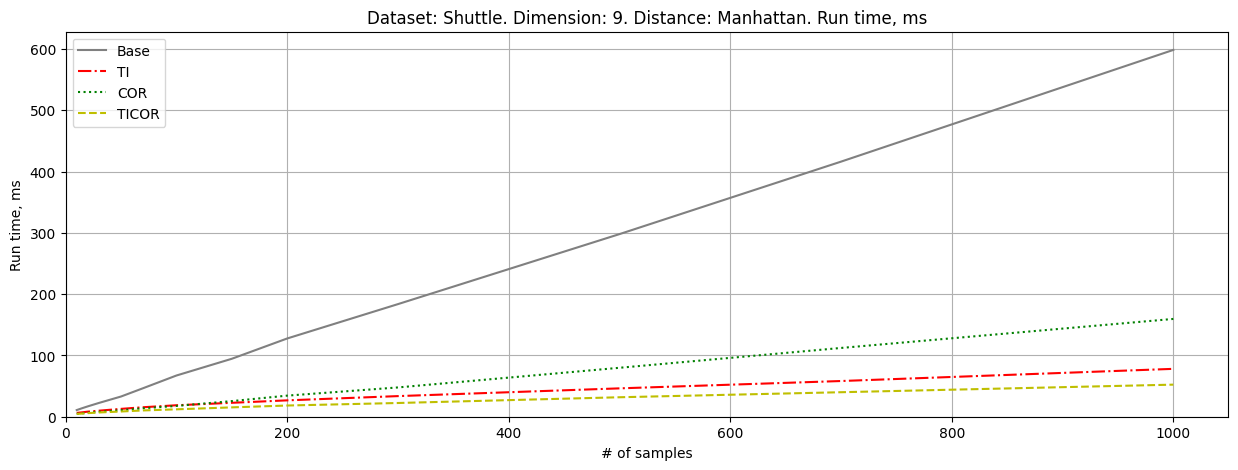

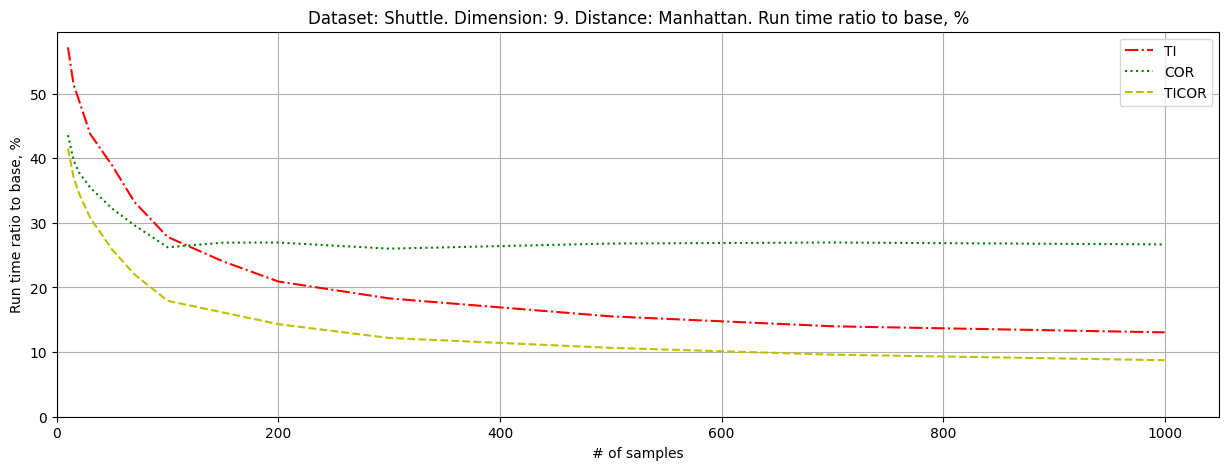

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,94.682,60.234 (63.62%),32.721 (34.56%),32.415 (34.24%)
15,143.67,77.630 (54.03%),48.475 (33.74%),46.973 (32.69%)
20,192.74,92.126 (47.80%),59.047 (30.64%),56.275 (29.20%)
30,298.29,110.96 (37.20%),87.613 (29.37%),77.823 (26.09%)
50,513.87,150.60 (29.31%),127.18 (24.75%),101.60 (19.77%)
70,724.63,186.64 (25.76%),150.39 (20.75%),110.47 (15.25%)
100,1039.1,223.40 (21.50%),171.22 (16.48%),106.67 (10.26%)
150,1552.0,290.97 (18.75%),212.19 (13.67%),112.10 (7.223%)
200,2062.8,380.32 (18.44%),261.51 (12.68%),134.82 (6.536%)
300,3099.6,501.58 (16.18%),325.47 (10.50%),132.19 (4.265%)


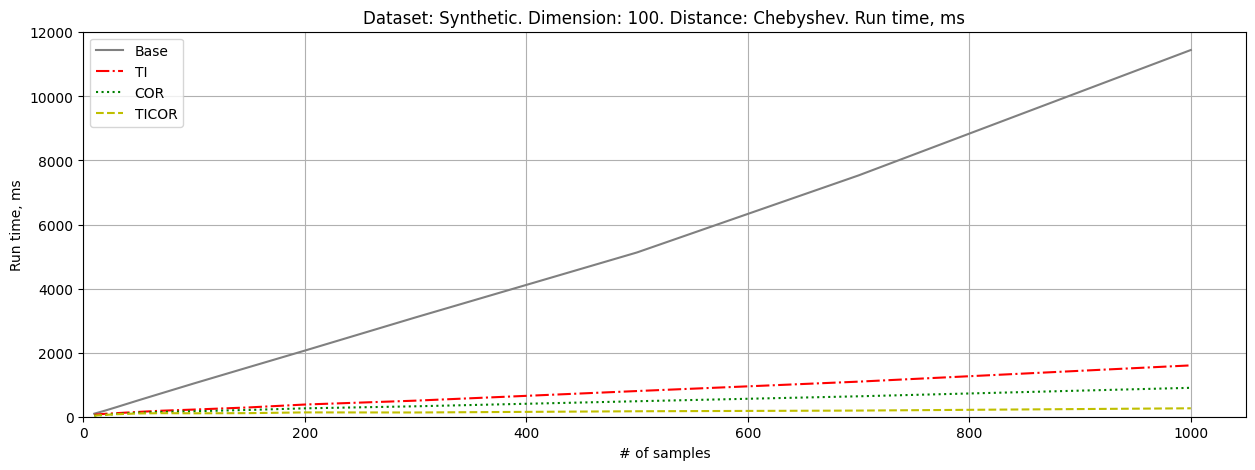

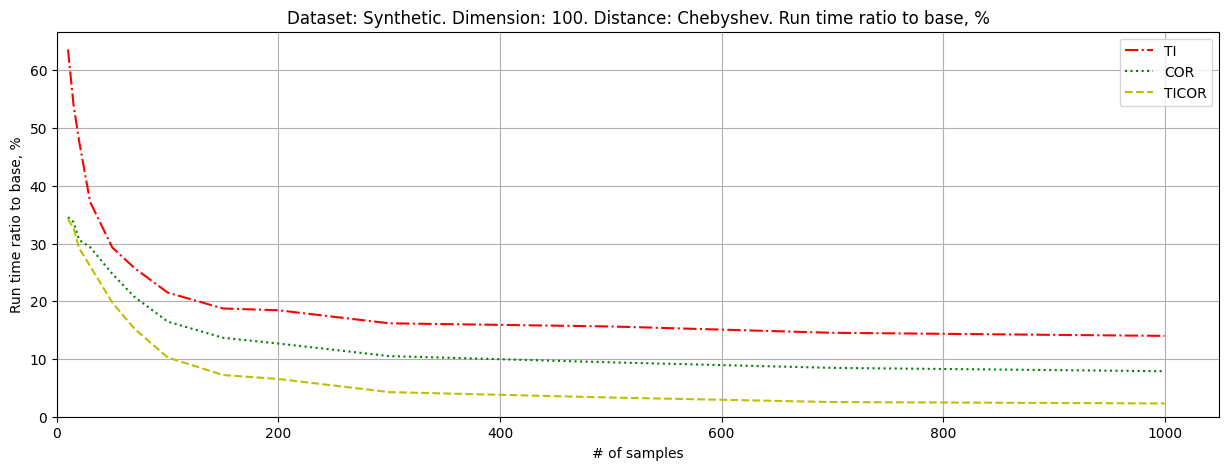

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","DP run time, ms (% to base)","TICOR run time, ms (% to base)","TICORDP run time, ms (% to base)"
10,63.668,40.490 (63.60%),22.494 (35.33%),55.018 (86.42%),22.338 (35.09%),25.355 (39.82%)
15,95.448,51.937 (54.41%),31.757 (33.27%),81.951 (85.86%),31.351 (32.85%),34.044 (35.67%)
20,125.53,60.595 (48.27%),40.981 (32.65%),107.59 (85.70%),39.413 (31.40%),41.937 (33.41%)
30,190.83,71.795 (37.62%),59.157 (31.00%),164.12 (86.01%),53.807 (28.20%),55.638 (29.16%)
50,319.87,87.496 (27.35%),74.357 (23.25%),279.61 (87.41%),59.376 (18.56%),60.644 (18.96%)
70,446.90,105.27 (23.56%),94.647 (21.18%),396.01 (88.61%),67.144 (15.02%),68.366 (15.30%)
100,631.43,135.54 (21.47%),114.92 (18.20%),563.55 (89.25%),75.701 (11.99%),76.797 (12.16%)
150,937.58,171.20 (18.26%),137.93 (14.71%),836.32 (89.20%),75.427 (8.045%),76.734 (8.184%)
200,1247.6,215.81 (17.30%),172.05 (13.79%),1127.4 (90.37%),84.866 (6.803%),86.225 (6.911%)
300,1858.3,294.87 (15.87%),216.21 (11.63%),1696.8 (91.31%),87.977 (4.734%),88.267 (4.750%)


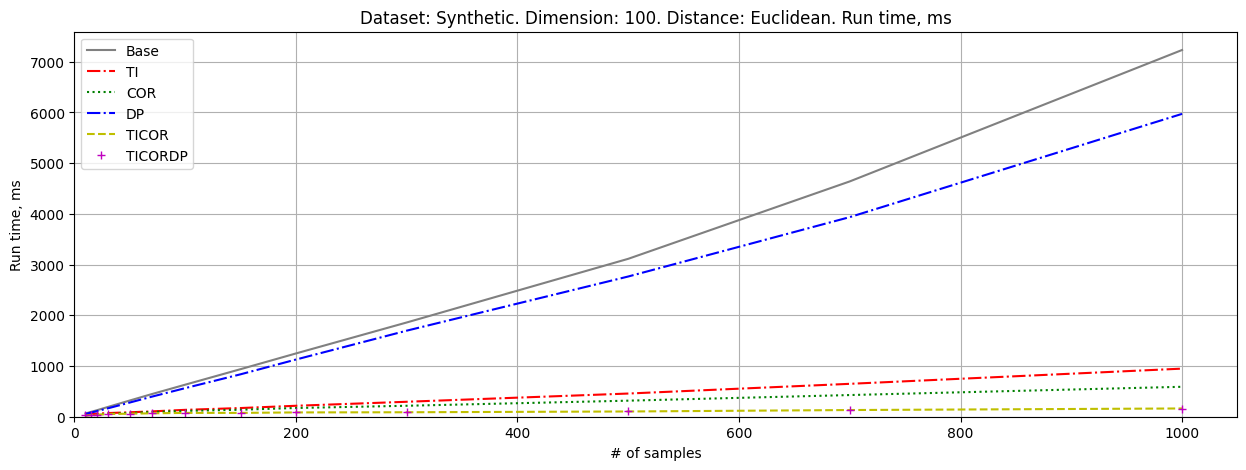

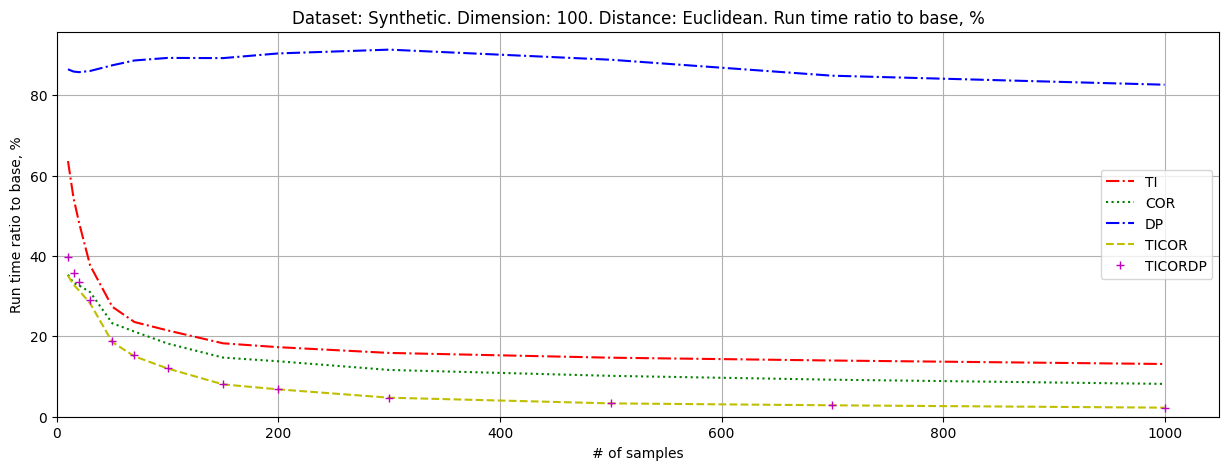

Samples,"Base run time, ms","TI run time, ms (% to base)","COR run time, ms (% to base)","TICOR run time, ms (% to base)"
10,67.811,43.580 (64.27%),23.286 (34.34%),22.950 (33.84%)
15,98.908,55.312 (55.92%),31.868 (32.22%),31.168 (31.51%)
20,128.99,61.869 (47.96%),42.627 (33.05%),40.671 (31.53%)
30,192.40,72.735 (37.80%),59.640 (31.00%),53.878 (28.00%)
50,324.18,93.289 (28.78%),76.986 (23.75%),63.956 (19.73%)
70,448.06,106.08 (23.68%),90.068 (20.10%),68.151 (15.21%)
100,631.53,127.30 (20.16%),103.52 (16.39%),68.494 (10.85%)
150,941.49,169.56 (18.01%),130.14 (13.82%),74.317 (7.894%)
200,1241.3,209.02 (16.84%),149.30 (12.03%),79.219 (6.382%)
300,1851.2,289.32 (15.63%),193.91 (10.48%),83.792 (4.526%)


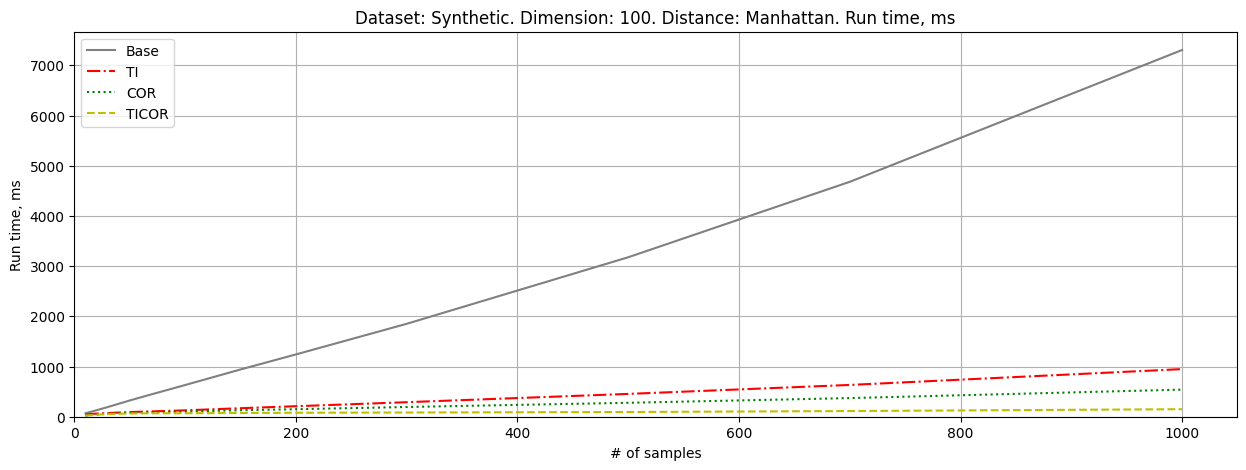

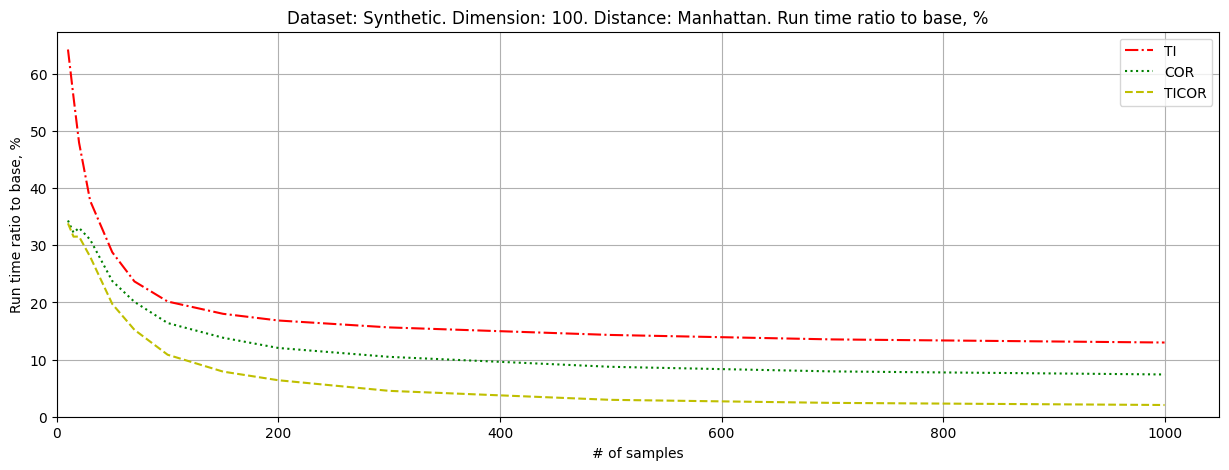

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os

folder = 'Normal'
datasets = ['ALOI', 'ForestCover', 'Satellite', 'Shuttle', 'Synthetic']
dimensions = [27, 10, 36, 9, 100]
alg_names = ['Base', 'TI', 'COR', 'DP', 'TICOR', 'TICORDP']
prefixes = ['ALOI', 'covtype', 'sat', 'Shuttle', 'Synthetic']
formats = ['gray', 'r-.', 'g:', 'b-.', 'y--', 'm+']

def getDistanceName(fileName):
    parts = fileName.split('.')
    subParts = parts[0].split('_')
    return subParts[-1]

def round_to_significant_digits(value, n):
    if value == 0:
        return f"{0:.{n-1}f}"  # Special case for 0

    magnitude = -int(f"{value:.1e}".split('e')[1])
    round_factor = n - 1 + magnitude
    rounded_value = round(value, round_factor)
    if(round_factor < 0):
        return str(int(rounded_value))

    format_string = f"{{:.{n - 1 + magnitude}f}}"
    return format_string.format(rounded_value)


def format_base_time(time):
    return f"{round_to_significant_digits(time, 5)}"

def format_time_and_percent(time, percent):
    return f"{round_to_significant_digits(time, 5)} ({round_to_significant_digits(percent, 4)}%)"

def displayDataSetTable(fileName):
    df = pd.read_csv(folder + '/' + fileName)

    cols = ['Samples', 'Base run time, ms']
    rename_cols = {}
 
    df[cols[1]] = df.apply(lambda r: format_base_time(r['Base_RunTime_Avg']), axis=1)
    
    for i in range(1, len(alg_names)):
        alg_name = alg_names[i]
        col_name_avg = alg_name + '_RunTime_Avg'
        col_name_percent = alg_name + '_RunTime_Percent'
        if col_name_avg in df.columns and col_name_percent in df.columns:
            df[alg_name] = df.apply(lambda r: format_time_and_percent(r[col_name_avg], r[col_name_percent]), axis=1)
            cols.append(alg_name)
            rename_cols[alg_name] = f"{alg_name} run time, ms (% to base)"
        
    
    df_display = df[cols].copy().rename(columns=rename_cols)
    display(HTML(df_display.to_html(index=False)))


def displayDataSetCharts(datasetName, dimension, fileName):

    distanceName = getDistanceName(fileName)
    df = pd.read_csv(folder + '/' + fileName)

    plt.figure(figsize=(15, 5))
    plt.title(f'Dataset: {datasetName}. Dimension: {str(dimension)}. Distance: {distanceName}. Run time, ms')
    plt.xlabel('# of samples')
    plt.ylabel('Run time, ms')
    plt.grid(True)

    for i in range(len(alg_names)):
        alg_name = alg_names[i]
        fmt = formats[i]
        columnName = alg_name + '_RunTime_Avg'
        if columnName in df.columns:
            plt.plot(df['Samples'], df[columnName], fmt, label=alg_name)

    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.title(f'Dataset: {datasetName}. Dimension: {str(dimension)}. Distance: {distanceName}. Run time ratio to base, %')
    plt.xlabel('# of samples')
    plt.ylabel('Run time ratio to base, %')
    plt.grid(True)

    for i in range(1, len(alg_names)):
        alg_name = alg_names[i]
        fmt = formats[i]
        columnName = alg_name + '_RunTime_Percent'
        if columnName in df.columns:
            plt.plot(df['Samples'], df[columnName], fmt, label=alg_name)

    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend()
    plt.show()



reportFiles = list(filter(lambda f: f.endswith('.csv'), os.listdir(folder)))

for i in range(len(datasets)):
    
    dataset_name = datasets[i]
    prefix = prefixes[i]
    dimension = dimensions[i]
    dataset_files = list(filter(lambda f: f.startswith(prefix + '_'), reportFiles))
    
    if len(dataset_files) == 0:
        continue
    
    display(HTML(f"<h2>Dataset: {dataset_name}</h2>"))
    
    for f in dataset_files:

        distance_name = getDistanceName(f)        
        display(HTML(f"<h3>Distance: {distance_name}</h3>"))
        displayDataSetTable(f)
        displayDataSetCharts(dataset_name, dimension, f)
